# Car Insurance Modeling


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data as dataframe
df = pd.read_csv("Car_insurance_clean+EDA.csv",index_col=0)

In [3]:
df.head()

,AGE,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER,VEHICLE_YEAR(before 2015),VEHICLE_TYPE(sports car)
0,3,0,0.629027,1.0,0.0,12.0,0,0,0,0.0,0,0,0
1,0,0,0.357757,0.0,0.0,16.0,0,0,0,1.0,1,1,0
2,0,0,0.493146,1.0,0.0,11.0,0,0,0,0.0,0,1,0
3,0,0,0.206013,1.0,0.0,11.0,0,0,0,0.0,1,1,0
4,1,1,0.388366,1.0,0.0,12.0,2,0,1,1.0,1,1,0


In [4]:
df.columns

Index(['AGE', 'DRIVING_EXPERIENCE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'MARRIED', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'GENDER', 'VEHICLE_YEAR(before 2015)',
       'VEHICLE_TYPE(sports car)'],
      dtype='object')

## Split the Data

In [5]:
#Take the 6 best Feauters
from sklearn.model_selection import train_test_split
X, y = df.drop(['OUTCOME','CREDIT_SCORE','MARRIED','ANNUAL_MILEAGE','GENDER','VEHICLE_YEAR(before 2015)', 'VEHICLE_TYPE(sports car)'],axis=1), df['OUTCOME']


In [6]:
X.head()

,AGE,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,3,0,1.0,0,0,0
1,0,0,0.0,0,0,0
2,0,0,1.0,0,0,0
3,0,0,1.0,0,0,0
4,1,1,1.0,2,0,1


In [7]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Split data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

<AxesSubplot:>

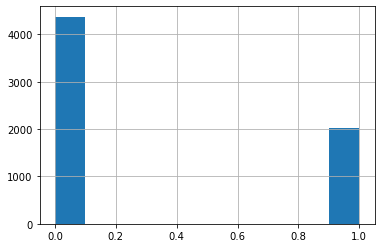

In [9]:
y_train.hist()

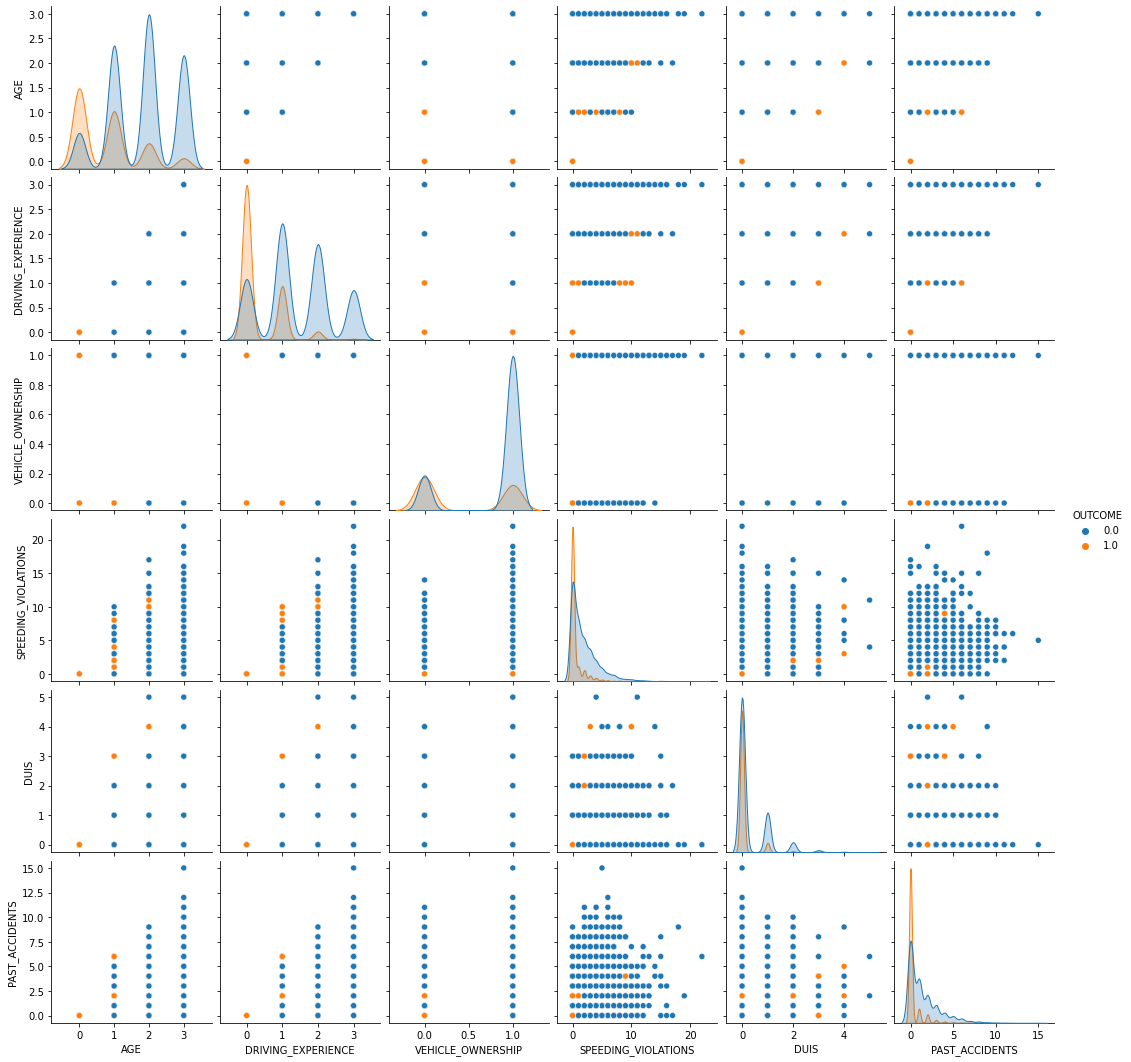

In [10]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='OUTCOME');

In [11]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [12]:
y_train.value_counts()

0.0    4373
1.0    2027
Name: OUTCOME, dtype: int64

In [13]:
y_test.value_counts()

0.0    1367
1.0     633
Name: OUTCOME, dtype: int64

In [14]:
y.value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [15]:
np.mean(y_train)

0.31671875

## Modeling

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#import lightgbm as ltb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


In [17]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

### LogisticRegression

In [18]:
lr_c=LogisticRegression(random_state=42, solver='lbfgs',max_iter=400 )
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('Accuracy on training set:',lr_c.score(X_train,y_train))
print('Accuracy on validation set:',lr_c.score(X_val,y_val))

Accuracy on training set: 0.800625
Accuracy on validation set: 0.800625


In [19]:
lr_c.score(X_val, y_val)

0.800625

Confusion Matrix for Logistic Regression Classifier 



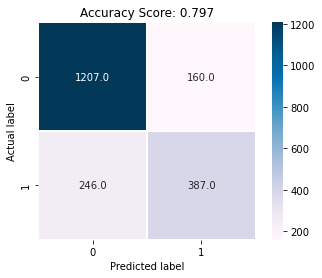

In [20]:
#Confusion matrix for logistic regression model
print("Confusion Matrix for Logistic Regression Classifier","\n")
score = round(accuracy_score(y_test, lr_pred),3) 
cm1 = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [21]:
print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, lr_c.predict(X_test)), 
         precision(y_test, lr_c.predict(X_test)), 
         recall(y_test, lr_c.predict(X_test)),
         F1(y_test, lr_c.predict(X_test))
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.7970 
 Precision: 0.7075 
 Recall: 0.6114 
 F1: 0.6559


### Random Forest

In [22]:
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
rf_ac=accuracy_score(y_test, rf_pred)
print('Accuracy on training set:',rf_clf.score(X_train,y_train))
print('Accuracy on validation set:',rf_clf.score(X_val,y_val))

Accuracy on training set: 0.81703125
Accuracy on validation set: 0.783125


In [23]:
print('RandomForestClassifiern: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, rf_clf.predict(X_test)), 
         precision(y_test, rf_clf.predict(X_test)), 
         recall(y_test, rf_clf.predict(X_test)),
         F1(y_test, rf_clf.predict(X_test))
        )
     )

RandomForestClassifiern: 
 Accuracy: 0.7920 
 Precision: 0.6776 
 Recall: 0.6540 
 F1: 0.6656


### Decision Tree

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
clf_pred = clf.predict(X_test)
clf_ac=accuracy_score(y_test, clf_pred)
print('Accuracy on training set:',clf.score(X_train,y_train))
print('Accuracy on validation set:',clf.score(X_val,y_val))

Accuracy on training set: 0.81765625
Accuracy on validation set: 0.78375


In [25]:
print('Decision Tree: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, clf.predict(X_test)), 
         precision(y_test, clf.predict(X_test)), 
         recall(y_test, clf.predict(X_test)),
         F1(y_test, clf.predict(X_test))
        )
     )

Decision Tree: 
 Accuracy: 0.7920 
 Precision: 0.6848 
 Recall: 0.6351 
 F1: 0.6590


### SVC

In [26]:
svc_r=SVC(kernel='rbf', random_state=0, probability=True)
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_ac=accuracy_score(y_test, svr_pred)
svr_val=svc_r.score(X_val,y_val)
pred_prob1 = svc_r.predict_proba(X_test)
print('Accuracy of training set: ', svr_ac)
print('Accuracy of training set: ', svr_val)


Accuracy of training set:  0.7955
Accuracy of training set:  0.795


In [27]:
print('SVM: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, svc_r.predict(X_test)), 
         precision(y_test, svc_r.predict(X_test)), 
         recall(y_test, svc_r.predict(X_test)),
         F1(y_test, svc_r.predict(X_test))
        )
     )

SVM: 
 Accuracy: 0.7955 
 Precision: 0.7090 
 Recall: 0.6003 
 F1: 0.6501


### K-nearest nieghbours


In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_val=clf.score(X_val,y_val)
knn_ac=accuracy_score(y_test, knn_pred)
print('Accuracy on training set:',knn.score(X_train,y_train))
print('Accuracy on validation set:',knn.score(X_val,y_val))

Accuracy on training set: 0.789375
Accuracy on validation set: 0.77375


In [29]:
print('K-nearest nieghbours: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, knn.predict(X_test)), 
         precision(y_test, knn.predict(X_test)), 
         recall(y_test, knn.predict(X_test)),
         F1(y_test, knn.predict(X_test))
        )
     )

K-nearest nieghbours: 
 Accuracy: 0.7675 
 Precision: 0.6981 
 Recall: 0.4676 
 F1: 0.5601


### AdaBoostClassifier

In [30]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
abc.fit(X_train, y_train)

#Predict the response for test dataset
abc_pred = abc.predict(X_test)
abc_ac=accuracy_score(y_test, abc_pred)
print('Accuracy on training set:',abc.score(X_train,y_train))
print('Accuracy on validation set:',abc.score(X_val,y_val))

Accuracy on training set: 0.8
Accuracy on validation set: 0.796875


In [31]:
print('AdaBoostClassifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, abc.predict(X_test)), 
         precision(y_test, abc.predict(X_test)), 
         recall(y_test, abc.predict(X_test)),
         F1(y_test, abc.predict(X_test))
        )
     )

AdaBoostClassifier: 
 Accuracy: 0.7990 
 Precision: 0.7200 
 Recall: 0.5972 
 F1: 0.6528


### GradientBoostingClassifier

In [32]:
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3,
                               learning_rate=.71)
gb_clf.fit(X_train, y_train)
gb_clf_pred = gb_clf.predict(X_test)
gb_clf_ac=accuracy_score(y_test, gb_clf_pred)
print("Accuracy score (training):" ,gb_clf.score(X_train, y_train))
print("Accuracy score (validation):",(gb_clf.score(X_val, y_val)))

Accuracy score (training): 0.8128125
Accuracy score (validation): 0.788125


In [33]:
print('GradientBoostingClassifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, gb_clf.predict(X_test)), 
         precision(y_test, gb_clf.predict(X_test)), 
         recall(y_test, gb_clf.predict(X_test)),
         F1(y_test, gb_clf.predict(X_test))
        )
     )

GradientBoostingClassifier: 
 Accuracy: 0.7940 
 Precision: 0.6908 
 Recall: 0.6319 
 F1: 0.6601


### XGBClassifier

In [34]:
#!pip install xgboost

In [35]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_clf_pred = xgb_clf.predict(X_test)
xgb_clf_ac=accuracy_score(y_test, xgb_clf_pred)
print("Accuracy score (training):" ,xgb_clf.score(X_train, y_train))
print("Accuracy score (validation):",(xgb_clf.score(X_val, y_val)))

/Users/AAHMT/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:18:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score (training): 0.81328125
Accuracy score (validation): 0.788125


In [36]:
print('XGBClassifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, xgb_clf.predict(X_test)), 
         precision(y_test, xgb_clf.predict(X_test)), 
         recall(y_test, xgb_clf.predict(X_test)),
         F1(y_test, xgb_clf.predict(X_test))
        )
     )

XGBClassifier: 
 Accuracy: 0.7910 
 Precision: 0.6831 
 Recall: 0.6335 
 F1: 0.6574


### CatBoostRegressor

In [37]:
#!pip install catboost

In [38]:
from catboost import CatBoostClassifier
cbr = CatBoostClassifier()
# Fit model
cbr.fit(X_train, y_train)
# Get predictions
cbr_pred = cbr.predict(X_test)
cbr_ac=accuracy_score(y_test, cbr_pred)


print("Accuracy score (training):" ,cbr.score(X_train, y_train))
print("Accuracy score (validation):",(cbr.score(X_val, y_val)))

Learning rate set to 0.02276
0:	learn: 0.6765566	total: 55.1ms	remaining: 55.1s
1:	learn: 0.6606576	total: 58.5ms	remaining: 29.2s
2:	learn: 0.6467184	total: 61.7ms	remaining: 20.5s
3:	learn: 0.6328466	total: 64.9ms	remaining: 16.2s
4:	learn: 0.6198457	total: 67ms	remaining: 13.3s
5:	learn: 0.6069685	total: 69.2ms	remaining: 11.5s
6:	learn: 0.5954530	total: 71.6ms	remaining: 10.2s
7:	learn: 0.5848017	total: 76.3ms	remaining: 9.46s
8:	learn: 0.5751770	total: 78.6ms	remaining: 8.66s
9:	learn: 0.5655299	total: 80.8ms	remaining: 8s
10:	learn: 0.5561587	total: 86.4ms	remaining: 7.77s
11:	learn: 0.5475585	total: 90.3ms	remaining: 7.43s
12:	learn: 0.5395506	total: 92.2ms	remaining: 7s
13:	learn: 0.5318652	total: 94.9ms	remaining: 6.68s
14:	learn: 0.5248415	total: 97.6ms	remaining: 6.41s
15:	learn: 0.5181161	total: 103ms	remaining: 6.33s
16:	learn: 0.5117052	total: 105ms	remaining: 6.08s
17:	learn: 0.5056633	total: 107ms	remaining: 5.86s
18:	learn: 0.5005181	total: 111ms	remaining: 5.71s
19:	l

223:	learn: 0.3964793	total: 1.02s	remaining: 3.52s
224:	learn: 0.3964748	total: 1.02s	remaining: 3.51s
225:	learn: 0.3964227	total: 1.02s	remaining: 3.5s
226:	learn: 0.3964220	total: 1.02s	remaining: 3.49s
227:	learn: 0.3963644	total: 1.03s	remaining: 3.48s
228:	learn: 0.3963063	total: 1.03s	remaining: 3.46s
229:	learn: 0.3962840	total: 1.03s	remaining: 3.45s
230:	learn: 0.3962285	total: 1.03s	remaining: 3.44s
231:	learn: 0.3961762	total: 1.04s	remaining: 3.43s
232:	learn: 0.3960768	total: 1.04s	remaining: 3.42s
233:	learn: 0.3960362	total: 1.04s	remaining: 3.42s
234:	learn: 0.3959921	total: 1.05s	remaining: 3.41s
235:	learn: 0.3959738	total: 1.05s	remaining: 3.4s
236:	learn: 0.3959442	total: 1.05s	remaining: 3.38s
237:	learn: 0.3959099	total: 1.05s	remaining: 3.38s
238:	learn: 0.3959026	total: 1.06s	remaining: 3.36s
239:	learn: 0.3958754	total: 1.06s	remaining: 3.35s
240:	learn: 0.3958633	total: 1.06s	remaining: 3.35s
241:	learn: 0.3958160	total: 1.07s	remaining: 3.35s
242:	learn: 0.

395:	learn: 0.3914221	total: 1.73s	remaining: 2.65s
396:	learn: 0.3913473	total: 1.74s	remaining: 2.64s
397:	learn: 0.3913327	total: 1.75s	remaining: 2.64s
398:	learn: 0.3913198	total: 1.75s	remaining: 2.64s
399:	learn: 0.3912988	total: 1.75s	remaining: 2.63s
400:	learn: 0.3912555	total: 1.76s	remaining: 2.63s
401:	learn: 0.3912203	total: 1.76s	remaining: 2.62s
402:	learn: 0.3912019	total: 1.76s	remaining: 2.62s
403:	learn: 0.3911124	total: 1.77s	remaining: 2.61s
404:	learn: 0.3910718	total: 1.77s	remaining: 2.61s
405:	learn: 0.3910307	total: 1.78s	remaining: 2.6s
406:	learn: 0.3910121	total: 1.78s	remaining: 2.6s
407:	learn: 0.3909432	total: 1.78s	remaining: 2.59s
408:	learn: 0.3909340	total: 1.79s	remaining: 2.58s
409:	learn: 0.3909207	total: 1.79s	remaining: 2.58s
410:	learn: 0.3908821	total: 1.79s	remaining: 2.57s
411:	learn: 0.3908237	total: 1.8s	remaining: 2.56s
412:	learn: 0.3907837	total: 1.8s	remaining: 2.56s
413:	learn: 0.3907771	total: 1.81s	remaining: 2.56s
414:	learn: 0.39

571:	learn: 0.3856065	total: 2.24s	remaining: 1.67s
572:	learn: 0.3855703	total: 2.24s	remaining: 1.67s
573:	learn: 0.3855358	total: 2.24s	remaining: 1.66s
574:	learn: 0.3855271	total: 2.24s	remaining: 1.66s
575:	learn: 0.3855045	total: 2.25s	remaining: 1.65s
576:	learn: 0.3854967	total: 2.25s	remaining: 1.65s
577:	learn: 0.3854691	total: 2.25s	remaining: 1.64s
578:	learn: 0.3854458	total: 2.25s	remaining: 1.64s
579:	learn: 0.3854354	total: 2.25s	remaining: 1.63s
580:	learn: 0.3854195	total: 2.26s	remaining: 1.63s
581:	learn: 0.3853944	total: 2.26s	remaining: 1.62s
582:	learn: 0.3853701	total: 2.26s	remaining: 1.62s
583:	learn: 0.3853488	total: 2.26s	remaining: 1.61s
584:	learn: 0.3853271	total: 2.27s	remaining: 1.61s
585:	learn: 0.3853167	total: 2.27s	remaining: 1.6s
586:	learn: 0.3852732	total: 2.27s	remaining: 1.6s
587:	learn: 0.3852598	total: 2.27s	remaining: 1.59s
588:	learn: 0.3852422	total: 2.27s	remaining: 1.58s
589:	learn: 0.3852337	total: 2.27s	remaining: 1.58s
590:	learn: 0.

801:	learn: 0.3809290	total: 2.76s	remaining: 682ms
802:	learn: 0.3809221	total: 2.81s	remaining: 690ms
803:	learn: 0.3809106	total: 2.82s	remaining: 687ms
804:	learn: 0.3808781	total: 2.82s	remaining: 683ms
805:	learn: 0.3808707	total: 2.82s	remaining: 679ms
806:	learn: 0.3808375	total: 2.82s	remaining: 675ms
807:	learn: 0.3808107	total: 2.83s	remaining: 671ms
808:	learn: 0.3807790	total: 2.83s	remaining: 668ms
809:	learn: 0.3807606	total: 2.83s	remaining: 664ms
810:	learn: 0.3807524	total: 2.83s	remaining: 660ms
811:	learn: 0.3807303	total: 2.83s	remaining: 656ms
812:	learn: 0.3807097	total: 2.84s	remaining: 653ms
813:	learn: 0.3806924	total: 2.84s	remaining: 649ms
814:	learn: 0.3806876	total: 2.84s	remaining: 645ms
815:	learn: 0.3806762	total: 2.85s	remaining: 642ms
816:	learn: 0.3806626	total: 2.85s	remaining: 638ms
817:	learn: 0.3806476	total: 2.85s	remaining: 634ms
818:	learn: 0.3806469	total: 2.85s	remaining: 630ms
819:	learn: 0.3806124	total: 2.85s	remaining: 626ms
820:	learn: 

964:	learn: 0.3781293	total: 3.13s	remaining: 114ms
965:	learn: 0.3781182	total: 3.13s	remaining: 110ms
966:	learn: 0.3781118	total: 3.13s	remaining: 107ms
967:	learn: 0.3780798	total: 3.14s	remaining: 104ms
968:	learn: 0.3780484	total: 3.14s	remaining: 100ms
969:	learn: 0.3780410	total: 3.14s	remaining: 97.2ms
970:	learn: 0.3780082	total: 3.14s	remaining: 93.9ms
971:	learn: 0.3780007	total: 3.15s	remaining: 90.6ms
972:	learn: 0.3779898	total: 3.15s	remaining: 87.3ms
973:	learn: 0.3779729	total: 3.15s	remaining: 84.1ms
974:	learn: 0.3779540	total: 3.15s	remaining: 80.8ms
975:	learn: 0.3779443	total: 3.15s	remaining: 77.6ms
976:	learn: 0.3779349	total: 3.15s	remaining: 74.3ms
977:	learn: 0.3779259	total: 3.16s	remaining: 71ms
978:	learn: 0.3778976	total: 3.16s	remaining: 67.8ms
979:	learn: 0.3778820	total: 3.16s	remaining: 64.5ms
980:	learn: 0.3778739	total: 3.16s	remaining: 61.3ms
981:	learn: 0.3778530	total: 3.17s	remaining: 58ms
982:	learn: 0.3778453	total: 3.17s	remaining: 54.8ms
98

In [39]:
print('CatBoostClassifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, cbr.predict(X_test)), 
         precision(y_test, cbr.predict(X_test)), 
         recall(y_test, cbr.predict(X_test)),
         F1(y_test, cbr.predict(X_test))
        )
     )

CatBoostClassifier: 
 Accuracy: 0.7950 
 Precision: 0.6939 
 Recall: 0.6303 
 F1: 0.6606


## Voting classifier



In [40]:
model_names = ["lr_c", "rf_clf", 'clf',"svc_r", "knn","abc","gb_clf","xgb_clf","cbr"]
model_var = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_var))
model_list

[('lr_c', LogisticRegression(max_iter=400, random_state=42)),
 ('rf_clf', RandomForestClassifier(n_estimators=10, random_state=42)),
 ('clf', DecisionTreeClassifier()),
 ('svc_r', SVC(probability=True, random_state=0)),
 ('knn', KNeighborsClassifier()),
 ('abc', AdaBoostClassifier(learning_rate=1)),
 ('gb_clf', GradientBoostingClassifier(learning_rate=0.71)),
 ('xgb_clf',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)),
 ('cbr', <catboost.core.C

In [41]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_c score: 0.797
rf_clf score: 0.792
clf score: 0.792
svc_r score: 0.7955
knn score: 0.7675
abc score: 0.799
gb_clf score: 0.794
xgb_clf score: 0.791
cbr score: 0.795


In [42]:
from sklearn.ensemble import VotingClassifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

Learning rate set to 0.02276
0:	learn: 0.6765566	total: 57.9ms	remaining: 57.8s
1:	learn: 0.6606576	total: 59.7ms	remaining: 29.8s
2:	learn: 0.6467184	total: 61.5ms	remaining: 20.4s
3:	learn: 0.6328466	total: 63.5ms	remaining: 15.8s
4:	learn: 0.6198457	total: 65.3ms	remaining: 13s
5:	learn: 0.6069685	total: 67.5ms	remaining: 11.2s
6:	learn: 0.5954530	total: 69.5ms	remaining: 9.85s
7:	learn: 0.5848017	total: 71.3ms	remaining: 8.84s
8:	learn: 0.5751770	total: 73.3ms	remaining: 8.07s
9:	learn: 0.5655299	total: 75.4ms	remaining: 7.46s
10:	learn: 0.5561587	total: 77.6ms	remaining: 6.97s
11:	learn: 0.5475585	total: 79.8ms	remaining: 6.57s
12:	learn: 0.5395506	total: 81.9ms	remaining: 6.22s
13:	learn: 0.5318652	total: 84ms	remaining: 5.92s
14:	learn: 0.5248415	total: 86ms	remaining: 5.65s
15:	learn: 0.5181161	total: 88.3ms	remaining: 5.43s
16:	learn: 0.5117052	total: 90.4ms	remaining: 5.23s
17:	learn: 0.5056633	total: 92.5ms	remaining: 5.04s
18:	learn: 0.5005181	total: 94.4ms	remaining: 4.87s

316:	learn: 0.3937092	total: 660ms	remaining: 1.42s
317:	learn: 0.3937100	total: 661ms	remaining: 1.42s
318:	learn: 0.3937008	total: 663ms	remaining: 1.41s
319:	learn: 0.3936969	total: 664ms	remaining: 1.41s
320:	learn: 0.3936801	total: 665ms	remaining: 1.41s
321:	learn: 0.3936293	total: 666ms	remaining: 1.4s
322:	learn: 0.3936268	total: 667ms	remaining: 1.4s
323:	learn: 0.3936057	total: 668ms	remaining: 1.39s
324:	learn: 0.3935885	total: 670ms	remaining: 1.39s
325:	learn: 0.3935586	total: 672ms	remaining: 1.39s
326:	learn: 0.3935585	total: 673ms	remaining: 1.39s
327:	learn: 0.3935416	total: 675ms	remaining: 1.38s
328:	learn: 0.3935121	total: 677ms	remaining: 1.38s
329:	learn: 0.3934852	total: 678ms	remaining: 1.38s
330:	learn: 0.3934557	total: 681ms	remaining: 1.38s
331:	learn: 0.3934453	total: 682ms	remaining: 1.37s
332:	learn: 0.3934077	total: 684ms	remaining: 1.37s
333:	learn: 0.3934013	total: 686ms	remaining: 1.37s
334:	learn: 0.3933820	total: 688ms	remaining: 1.36s
335:	learn: 0.

VotingClassifier(estimators=[('lr_c',
                              LogisticRegression(max_iter=400,
                                                 random_state=42)),
                             ('rf_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('clf', DecisionTreeClassifier()),
                             ('svc_r', SVC(probability=True, random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('abc', AdaBoostClassifier(learning_rate=1)),
                             ('gb_clf',
                              GradientBoostingClassifier(lear...
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                         

In [43]:
y_pred1 = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred1)

0.7975

Text(0.5, 1.0, 'Model Accuracy')

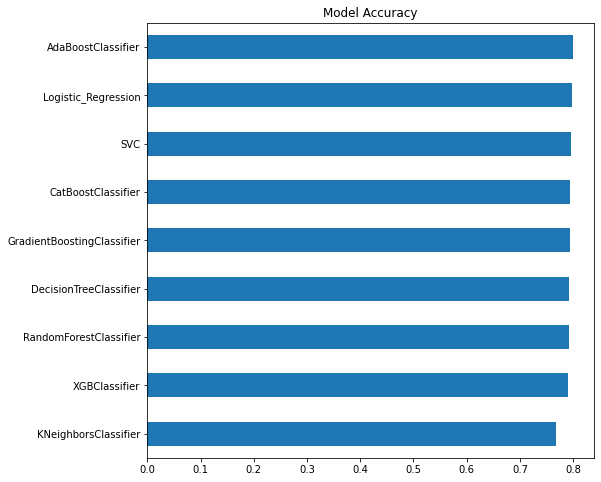

In [44]:
#Plot of accuracy of all models
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,rf_ac, clf_ac,svr_ac, knn_ac,abc_ac,gb_clf_ac,xgb_clf_ac,cbr_ac], 
        index=['Logistic_Regression','RandomForestClassifier','DecisionTreeClassifier','SVC','KNeighborsClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','CatBoostClassifier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

## Plot the ROC Curve

Next, we’ll calculate the true positive rate and the false positive rate and create a ROC curve for for all the models by using the Matplotlib data visualization package

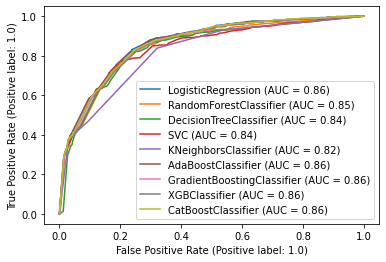

In [46]:
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

#create ROC curve for all the models (stands for: “receiver operating characteristic” curve)

disp =  RocCurveDisplay.from_estimator(lr_c, X_test, y_test) 
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(svc_r, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(abc, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(gb_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(cbr, X_test, y_test, ax=disp.ax_);